# Ordinary differential equations  

This notebook is for exploration and checking your work. The autograder evaluates your functions in `src/ode_model.py`.

## Instructions
- Open `src/ode_model.py` and implement functions.
- Use the cells below to visualize and reason about your results.
- Feel free to further expand the notebook and use this to test your functions. This notebook is not graded.  

In [1]:
import importlib 
import numpy as np
import matplotlib.pyplot as plt

ode = importlib.import_module('src.ode_model')
print(ode.ParamsABC())

ParamsABC(k1_per_s=100.0, k2_per_s=0.1, tol_mass=1e-09, tol_neg=1e-12)


### Quick test

In [2]:
p = ode.ParamsABC(k1_per_s=1.0, k2_per_s=0.5)
x0 = np.array([1.0, 0.0, 0.0])
t_end_s, dt_s = 1.0, 0.1

In [3]:
ode.dxdt(x0, p)

array([-1.,  1.,  0.])

In [4]:
ode.euler_step(x0, p, dt_s)

array([0.9, 0.1, 0. ])

In [5]:
import inspect
print(inspect.getsource(ode.simulate))

def simulate(x0, t_end_s, dt_s, params, checks=True, clip_negative=False):
    """
    Generic simulator with light numerical checks.
    Creates t, a time array from time 0 to t_end_s. Creates X, an array of simulated concentration values, with each row containing concentrations of A, B, and C at corresponding time points. The first row is x0.
    
    Units: x0,X [µM]; t,t_end_s,dt_s [s]; k1,k2 [1/s].
    
    Args: 
    x0:    specifies the initial concentrations [A0, B0, C0].
    t_end_s:    gives the final integration time in units of seconds.
    dt_s:    time step in units of seconds.
    params:    special container that holds four variables that can be accessed by name - two reaction rates k1_per_s and k2_per_s, and two parameters tol_mass and tol_neg that we will use later for checking our work. To access one of these variables, you can use the . operator, as in params.k1_per_s.
    checks:    boolean (input True or False) which will make this function perform a few simple te

In [6]:
f, m = ode.simulate(x0, t_end_s, dt_s, p, checks=True)

In [9]:
print(f, m)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [[1.         0.         0.        ]
 [0.9        0.1        0.        ]
 [0.81       0.185      0.005     ]
 [0.729      0.25675    0.01425   ]
 [0.6561     0.3168125  0.0270875 ]
 [0.59049    0.36658188 0.04292813]
 [0.531441   0.40730178 0.06125722]
 [0.4782969  0.44008079 0.08162231]
 [0.43046721 0.46590644 0.10362635]
 [0.38742049 0.48565784 0.12692167]
 [0.34867844 0.500117   0.15120456]]


In [12]:
print(f.shape, m.shape)

(11,) (11, 3)


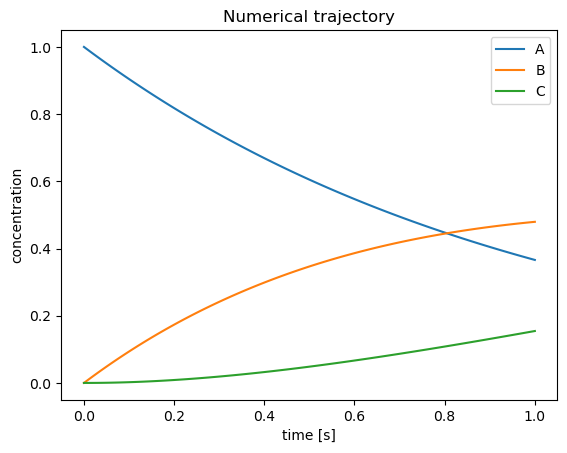

In [13]:
p = ode.ParamsABC(k1_per_s=1.0, k2_per_s=0.5)
x0 = np.array([1.0, 0.0, 0.0])
t_end_s, dt_s = 1.0, 0.01

# Uncomment after implementing `ode.simulate`
t, X = ode.simulate(x0, t_end_s, dt_s, p, checks=False)
#print(ode.simulate(x0, t_end_s, dt_s, p, checks=False))
plt.figure()
plt.plot(t, X[:,0], label='A')
plt.plot(t, X[:,1], label='B')
plt.plot(t, X[:,2], label='C')
plt.xlabel('time [s]')
plt.ylabel('concentration')
plt.legend()
plt.title('Numerical trajectory')
plt.show()

### Compare to analytical references

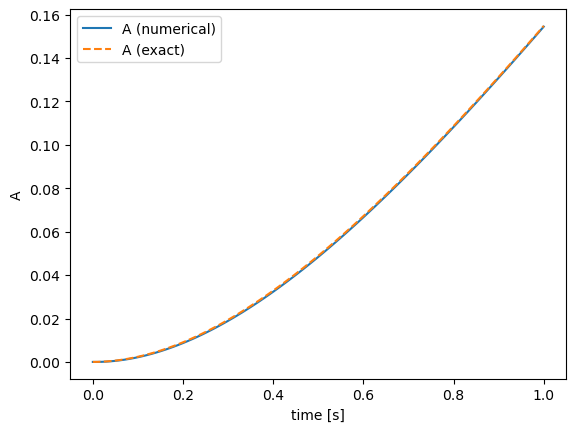

In [16]:
# Uncomment after implementing `analytic_*` functions:
A_ex = ode.analytic_A(t, x0[0], p.k1_per_s)
B_ex = ode.analytic_B(t, x0[0], p.k1_per_s, p.k2_per_s)
C_ex = ode.analytic_C(t, x0[0], p.k1_per_s, p.k2_per_s)

plt.figure()
plt.plot(t, X[:,2], label='A (numerical)')
plt.plot(t, C_ex, '--', label='A (exact)')
plt.xlabel('time [s]')
plt.ylabel('A')
plt.legend()
plt.show()